## Noise Targets

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
with open('data/preprocessed.npy', 'rb') as fp:
    feats1 = np.load(fp)
    feats2 = np.load(fp)
    feats3 = np.load(fp)
    feats4 = np.load(fp)
    feats5 = np.load(fp)
    feats6 = np.load(fp)
    feats7 = np.load(fp)
    feats8 = np.load(fp)
    feats9 = np.load(fp)

In [3]:
(
    feats1.shape, feats2.shape, feats3.shape, feats4.shape, feats5.shape, 
    feats6.shape, feats7.shape, feats8.shape, feats9.shape
)

((1000, 384),
 (1000, 21),
 (1000, 16),
 (1000, 47),
 (1000, 3),
 (1000, 20),
 (1000, 6),
 (1000, 2),
 (1000, 4))

In [4]:
df = pd.read_csv("data/ratings.csv", encoding="ISO-8859-1")
texts = df["Sentence"].values
y1mos = df["MOS_Complexity"].values
y1std = df["Std_Complexity"].values
y2mos = df["MOS_Understandability"].values
y2std = df["Std_Understandability"].values
y3mos = df["MOS_Lexical_difficulty"].values
y3std = df["Std_Lexical_difficulty"].values

In [5]:
y_train = np.c_[y1mos, y2mos, y3mos]
rho = np.corrcoef(y_train, rowvar=False)
rho

array([[1.        , 0.89598348, 0.90518689],
       [0.89598348, 1.        , 0.93461015],
       [0.90518689, 0.93461015, 1.        ]])

### Simulate Targets

In [22]:
def get_random_mos(y1m, y1s, y2m, y2s, y3m, y3s, adjust=1.0, rho=None, corr_trgt=0):
    num = 1 if isinstance(y1m, float) else len(y1m)
    Y = np.random.standard_normal((num, 3))
    Y = adjust * Y
    if (rho is not None) and (corr_trgt == 1):
        Y = np.dot(Y, np.linalg.cholesky(rho).T)
    y1 = np.maximum(1.0, np.minimum(7.0, Y[:, 0] * y1s + y1m))
    y2 = np.maximum(1.0, np.minimum(7.0, Y[:, 1] * y2s + y2m))
    y3 = np.maximum(1.0, np.minimum(7.0, Y[:, 2] * y3s + y3m))
    return y1, y2, y3

y1, y2, y3 = get_random_mos(
    y1mos, y1std, y2mos, y2std, y3mos, y3std, 
    adjust=.1, rho=rho, corr_trgt=1)

y_sim = np.c_[y1, y2, y3]
np.corrcoef(y_sim, rowvar=False)

array([[1.        , 0.89547545, 0.90450646],
       [0.89547545, 1.        , 0.93196886],
       [0.90450646, 0.93196886, 1.        ]])

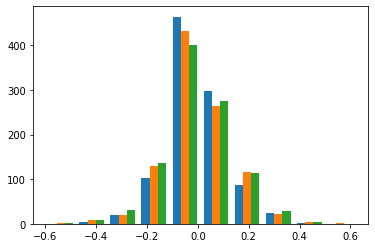

In [23]:
plt.hist(y_train - y_sim);

In [24]:
y1, y2, y3 = get_random_mos(
    y1mos[0], y1std[0], y2mos[0], y2std[0], y3mos[0], y3std[0], 
    adjust=.1, rho=rho, corr_trgt=1)
y1, y2, y3

(array([1.90846915]), array([1.86036079]), array([2.59581001]))

### Differenc between correlations

In [8]:
def get_corr(y1, y2, y3, feats):
    tmp1, tmp2, tmp3 = [], [], []
    for j in range(feats.shape[1]):
        rho, _ = scipy.stats.pearsonr(y1, feats[:, j])
        tmp1.append(rho)
        rho, _ = scipy.stats.pearsonr(y2, feats[:, j])
        tmp2.append(rho)
        rho, _ = scipy.stats.pearsonr(y3, feats[:, j])
        tmp3.append(rho)
    return np.c_[tmp1, tmp2, tmp3]

In [9]:
adjust = .1
num_trials = 30

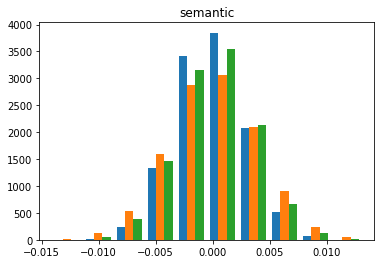

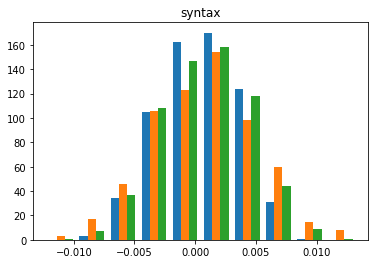

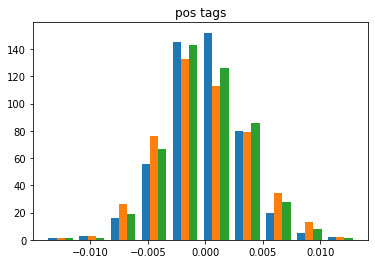

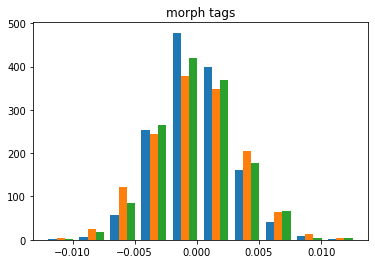

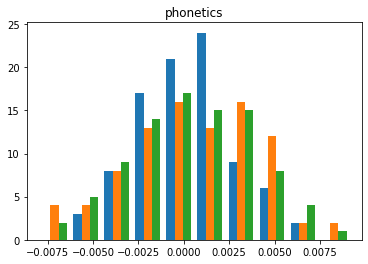

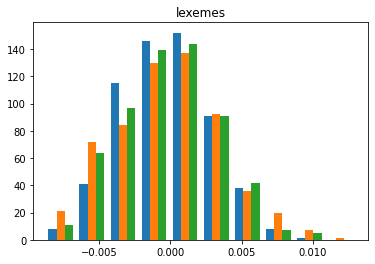

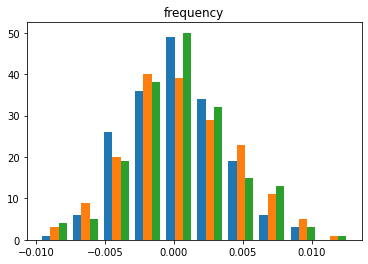

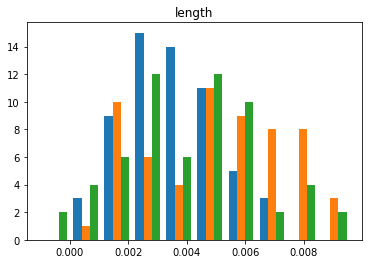

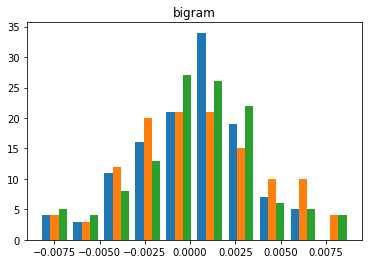

In [10]:
tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats1))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats1))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("semantic")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats2))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats2))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("syntax")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats3))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats3))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("pos tags")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats4))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats4))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("morph tags")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats5))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats5))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("phonetics")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats6))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats6))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("lexemes")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats7))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats7))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("frequency")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats8))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats8))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("length")
plt.show();

tmp0, tmp1 = [], []
for i in range(num_trials):
    y1, y2, y3 = get_random_mos(
        y1mos, y1std, y2mos, y2std, y3mos, y3std, 
        adjust=adjust, rho=rho, corr_trgt=1)
    tmp0.append(get_corr(y1=y1mos, y2=y2mos, y3=y3mos, feats=feats9))
    tmp1.append(get_corr(y1=y1, y2=y2, y3=y3, feats=feats9))
tmp0 = np.vstack(tmp0)
tmp1 = np.vstack(tmp1)
plt.hist(tmp0 - tmp1);
plt.title("bigram")
plt.show();